> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMDb movie data



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
1. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. 
2. There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. 
3. The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
> <div class="alert alert-block alert-success"> The dataset contains data for <b>10866  </b>movies. There are total 21 columns with few of the important fields like revenue, budget, genres etc. which I will be using today for the analysis. <br/>

    
> <div class="alert alert-block alert-success">
    As mentioned in the rubrics 'The project clearly states one or more questions, then addresses those questions in the rest of the analysis.', I will attempt following questions from the dataset.<br/>
    (a)  <b>How have movie genres changed over time? </b><br/> I am planning to use variables such as: Genres (Primary), Total No. of movies, Release year, Budget, Revenue, Profit (Revenue – Budget) <br/>
    (b)  <b>Assuming I am planning to launch my production house, which movie I should create ?</b> To provide the recommendation I will try to answer the follow up questions:<br/>
        1)  Most profitable genre<br/>
        2)  Most popular genre<br/>
    I will get some insight from the first question<br/>
        3)  Highest budget movies<br/>
        4)  Most Profitable movies<br/>
    
<br/></div>

In [17]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import csv as csv
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#Load the data
df = pd.read_csv('tmdb-movies.csv')
# print first 5 and last 5 records, one at a time
df.head(1)
df.tail(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [3]:
# describe the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 
> <div class="alert alert-block alert-success">
    Following data cleasing activities will be performed in upcoming cells<br/>
    (a)  <b>Remove duplicates </b><br/>
    (b)  <b>Remove extra columns. Column required for analysis are - id, popularity, budget, revenue, runtime, genres, production companies, keywords, tagline </b><br/>
    (c)  <b>Remove records with budget and revenue as 0 as those are required to calculate the profitability </b><br/>
    (d)  <b>Find and handle NULL values, either drop or replace with 0 </b><br/>
    (e)  <b>Split the column values by '|' and take the first value from genres and production companies </b><br/>
    (f)  <b>Validate the datatype for each field and update if required </b><br/>
    <br/></div>

In [4]:
# Find duplicate values in the data set, only 1 duplicate record found
sum(df.duplicated())


1

In [5]:
# remove the duplicate record and run the same command again to see if there are no more duplicates
df.drop_duplicates(inplace = True)
sum(df.duplicated())

0

In [6]:
# Validate the record count, one record dropped
df.shape

(10865, 21)

In [7]:

#remove extra columns
df.drop(['imdb_id','original_title','cast','homepage','director','overview','release_date','vote_count','vote_average','budget_adj','revenue_adj'],axis =1,inplace = True)

In [8]:
df.head()

,id,popularity,budget,revenue,tagline,keywords,runtime,genres,production_companies,release_year
0,135397,32.985763,150000000,1513528810,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015
1,76341,28.419936,150000000,378436354,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,262500,13.112507,110000000,295238201,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,140607,11.173104,200000000,2068178225,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,168259,9.335014,190000000,1506249360,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015


In [9]:
print('Records before dropping NULL',df.shape)
df.isnull().sum()

#drop the records with NULL values
df.dropna(axis=0, inplace=True)
print('Records after dropping NULL',df.shape)

Records before dropping NULL (10865, 10)
Records after dropping NULL (7046, 10)


In [10]:
# Movie data with 0 value populated for runtime, budget and revenue seems unrealistic and hence can be dropped for better analysis
# replace the 0 values with NAN
# I have create three copies for each question and will remove the null values based on tha analysis
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

print('df1 = ',df1.shape)
print('df2 = ',df2.shape)
print('df3 = ',df3.shape)

df1['runtime'].replace(0, np.NaN, inplace=True)
df1['revenue'].replace(0, np.NaN, inplace=True)
df1['budget'].replace(0, np.NaN, inplace=True)

# For question # 1: Remove the records with no value in the budget, revenue and runtime as those are important parameter.
df1.dropna(subset=['budget','revenue','runtime'], inplace=True)

print('df1 = ',df1.shape)
print('df2 = ',df2.shape)
print('df3 = ',df3.shape)

df.isnull().sum()

df1 =  (7046, 10)
df2 =  (7046, 10)
df3 =  (7046, 10)
df1 =  (3446, 10)
df2 =  (7046, 10)
df3 =  (7046, 10)


id                      0
popularity              0
budget                  0
revenue                 0
tagline                 0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_year            0
dtype: int64

> <div class="alert alert-block alert-success"> The data in genre, keywords and prodution companies is contactinated with pipe '|' operator. I will pick the first letter from genre and production compaies and will need to search for keyword.<br/>
To perform this task I will create a function to split the columns <br/>

</div>



In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#Function split
def split(column):
    return column.str[0:].str.split('|', expand = True)
genres = split(df1['genres'])
production_companies = split(df1['production_companies'])
keywords = split(df1['keywords'])

df1["genres"] = genres[0]
df1["production_companies"] = production_companies[0]

genres = split(df2['genres'])
production_companies = split(df2['production_companies'])
keywords = split(df2['keywords'])
df2["genres"] = genres[0]
df2["production_companies"] = production_companies[0]




><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
 The df2 and df2 dataframes will be used in the question 1 and 2, will have genres and production_companies splitted and first value will be used for further analysis
</div>
    
</div>

genres
Action             5.803415e+10
Adventure          4.826626e+10
Comedy             3.949813e+10
Drama              3.453913e+10
Animation          1.943329e+10
Science Fiction    1.178472e+10
Fantasy            1.139852e+10
Horror             1.067095e+10
Crime              7.599643e+09
Thriller           7.287252e+09
Name: profit, dtype: float64

genres
Action             5.803415e+10
Drama              3.453913e+10
Comedy             3.949813e+10
Adventure          4.826626e+10
Horror             1.067095e+10
Science Fiction    1.178472e+10
Thriller           7.287252e+09
Crime              7.599643e+09
Animation          1.943329e+10
Fantasy            1.139852e+10
Name: profit, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### <b>Question # 1:   How have movie genres changed over time? </b><br/> I am planning to use variables such as: Genres (Primary), Total No. of movies, Release year, Budget, Revenue, Profit (Revenue – Budget) <br/>

In [44]:
df1.dtypes
# Add new column to the dataframe to capture the Profit = Revenue - Budget
df1['profit'] = df1['revenue'].sub(df1['budget'],axis = 'index')
#display(df1.groupby('genres').sum().sort_values(by = 'profit',ascending = False)['profit'][0:10])
#display(df1.groupby('genres').sum().sort_values(by = 'popularity',ascending = False)['profit'][0:10])

# Action movies are most profitable 

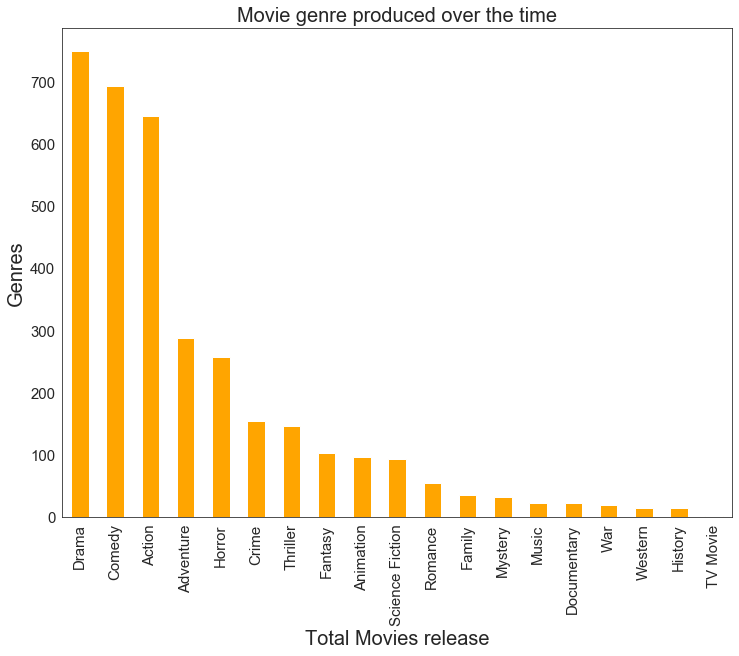

Drama              750
Comedy             694
Action             646
Adventure          288
Horror             258
Crime              154
Thriller           146
Fantasy            103
Animation           97
Science Fiction     94
Romance             55
Family              36
Mystery             33
Documentary         22
Music               22
War                 19
Western             14
History             14
TV Movie             1
Name: genres, dtype: int64

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

movies = df1.groupby('genres').count()['id'].copy()

sns.set_style("white")
movies.sort_values(ascending = False).plot(kind= 'bar',figsize = (12,9),fontsize=15,color = 'orange',)
plt.xlabel('Total Movies release' , fontsize = 20)
plt.ylabel('Genres' , fontsize = 20)
plt.title('Movie genre produced over the time',fontsize = 20)
plt.show()

df1['genres'].value_counts()

><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
 The top 5 movies genre created over the time: <br/>
    1. Drama <br/>
    2. Comedy<br/>
    3. Action<br/>
    4. Adventure<br/>
    5. Horror<br/>
</div>
    
</div>

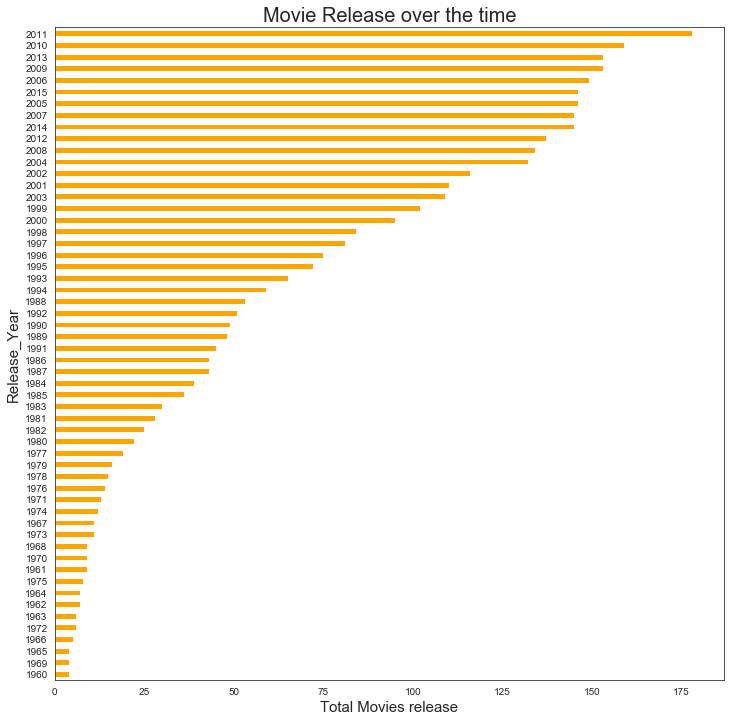

In [57]:
# Analyze the total movies trend in last 55 years
movies = df1.groupby('release_year').count()['id'].copy()

sns.set_style("white")
movies.sort_values(ascending = True).plot(kind= 'barh',figsize = (12,12),fontsize=10,color = 'orange')
plt.xlabel('Total Movies release' , fontsize = 15)
plt.ylabel('Release_Year' , fontsize = 15)
plt.title('Movie Release over the time',fontsize = 20)
plt.show()



><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
 The total production of movies has been increased over the time, especially after 1990s
</div>
    
</div>

/Users/pp/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Legend does not support 0      1960
5      1961
13     1963
23     1965
25     1966
30     1967
36     1968
44     1970
50     1971
56     1972
60     1973
67     1974
80     1976
86     1977
96     1978
101    1979
108    1980
125    1981
134    1982
141    1983
150    1984
161    1985
172    1986
182    1987
192    1988
202    1989
212    1990
223    1991
233    1992
246    1993
257    1994
270    1995
282    1996
294    1997
308    1998
324    1999
333    2000
345    2001
360    2002
377    2003
391    2004
408    2005
421    2006
438    2007
453    2008
470    2009
485    2010
499    2011
515    2012
530    2013
546    2014
562    2015
Name: release_year, dtype: int64 instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
/Users/pp/anaconda3/lib/python3.7/site-packages/ipykernel_lau

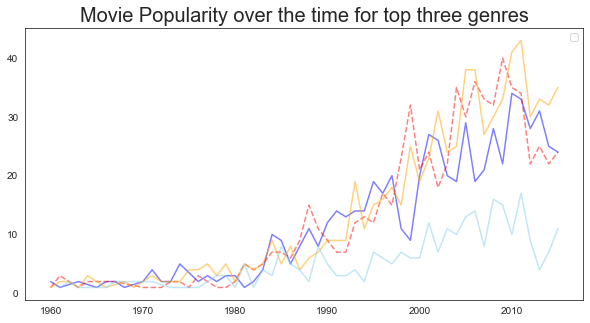

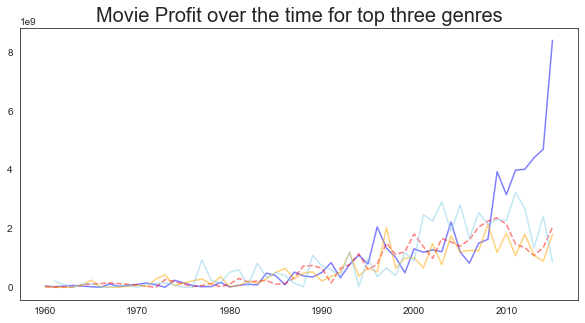

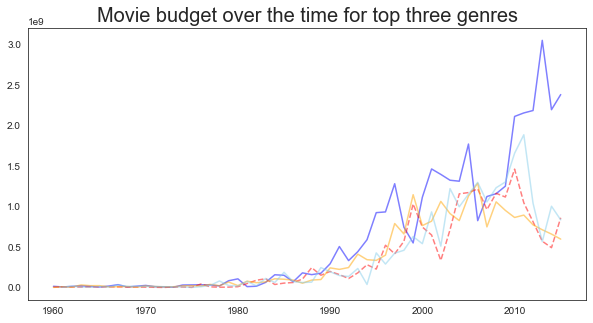

In [112]:
# analyze the top most genre for last 15 years
movies1 = df1.groupby('release_year')['genres'].value_counts().reset_index(name = 'counts').copy()
movies1.set_index('genres',inplace =True)
#movies1[movies1["release_year"].between(2000,2015)].groupby(['release_year'])['counts'].idxmax()
#movies1[movies1["release_year"].between(2010,2015)]
movies1 = movies1.reset_index()
#print(movies1)

fig,ax = plt.subplots(figsize=(10,5))
x = movies1[movies1['genres']=='Action']['release_year']
y = movies1[movies1['genres']=='Action']['counts']
x1 = movies1[movies1['genres']=='Comedy']['release_year']
y1 = movies1[movies1['genres']=='Comedy']['counts']
x2 = movies1[movies1['genres']=='Drama']['release_year']
y2 = movies1[movies1['genres']=='Drama']['counts']
x3 = movies1[movies1['genres']=='Adventure']['release_year']
y3 = movies1[movies1['genres']=='Adventure']['counts']
plt.title('Movie Popularity over the time for top three genres',fontsize = 20)
plt.legend([x,x1,x2,x3],['Action', 'Comedy','Drama', 'Adventure'])
plt.plot(x, y,'b',x1,y1,'r--',x2,y2,'orange',x3,y3,'skyblue',label = 'Popularity', alpha=0.5,)

movies2 = df1.groupby(['release_year','genres']).sum()#.reset_index(name = 'sum').copy()
movies2 = movies2.reset_index()
#print(movies2)
fig,ax = plt.subplots(figsize=(10,5))
x = movies2[movies2['genres']=='Action']['release_year']
y = movies2[movies2['genres']=='Action']['profit']
x1 = movies2[movies2['genres']=='Comedy']['release_year']
y1 = movies2[movies2['genres']=='Comedy']['profit']
x2 = movies2[movies2['genres']=='Drama']['release_year']
y2 = movies2[movies2['genres']=='Drama']['profit']
x3 = movies2[movies2['genres']=='Adventure']['release_year']
y3 = movies2[movies2['genres']=='Adventure']['profit']
plt.title('Movie Profit over the time for top three genres',fontsize = 20)
plt.plot(x, y,'b',x1,y1,'r--',x2,y2,'orange',x3,y3,'skyblue',label = 'profit', alpha=0.5,)

fig,ax = plt.subplots(figsize=(10,5))
x = movies2[movies2['genres']=='Action']['release_year']
y = movies2[movies2['genres']=='Action']['budget']
x1 = movies2[movies2['genres']=='Comedy']['release_year']
y1 = movies2[movies2['genres']=='Comedy']['budget']
x2 = movies2[movies2['genres']=='Drama']['release_year']
y2 = movies2[movies2['genres']=='Drama']['budget']
x3 = movies2[movies2['genres']=='Adventure']['release_year']
y3 = movies2[movies2['genres']=='Adventure']['budget']
plt.title('Movie budget over the time for top three genres',fontsize = 20)
plt.plot(x, y,'b',x1,y1,'r--',x2,y2,'orange',x3,y3,'skyblue',label = 'profit', alpha=0.5,)

<a id='conclusions'></a>
## Conclusions

> <div class="alert alert-success" role="alert">
    1. Drama, Comedy and Action movies are produced most in the last 55 years, the production increased substantially from 90s.<br/>
    2. Drama and Comedy are the most popular especially over the last 3 decades<br/>
    3. Action is the most profitable Genre<br/>
    4. Adventure Genre movies are the most expensive movies.<br/>
         5. The budget of Action and Adventure movies are higher than Drama and Crime<br/>




    
    

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### Research Question 2  Assuming I am planning to launch my production house, which movie I should create ?

> <div class="alert alert-success" role="alert">
    From question 1 we learned that:<br/>
        1.  Drama Comedy and Action are the most produced genre so now we can deep dive on different variables like popularity, production companies etc. to decide what kind of movie I should produce. <br/>
</div>
    
><div class="alert alert-danger" role="alert"> 
   * I will use df1 and df2 (full dataset) for this analysis

</div>

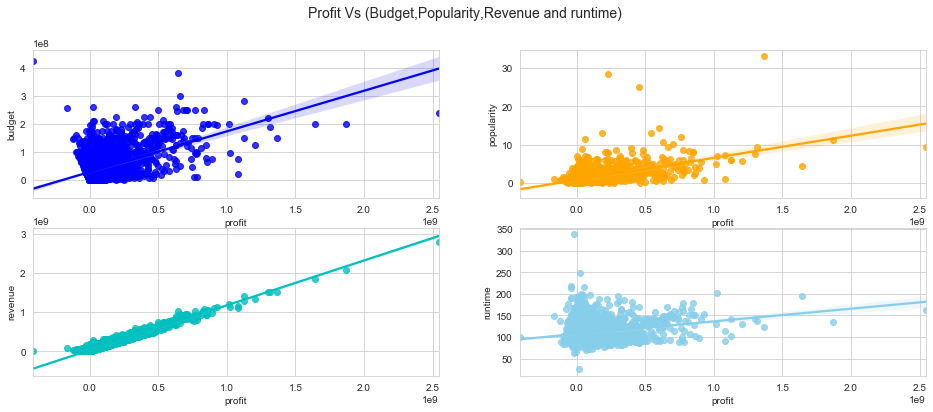

In [34]:
# Analyze relation between key variables 
sns.set_style("whitegrid")
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Profit Vs (Budget,Popularity,Revenue and runtime)",fontsize=14)

sns.regplot(x=df1['profit'], y=df1['budget'],color='b',ax=axes[0][0])
sns.regplot(x=df1['profit'], y=df1['popularity'],color='orange',ax=axes[0][1])
sns.regplot(x=df1['profit'], y=df1['revenue'],color='c',ax=axes[1][0])
sns.regplot(x=df1['profit'], y=df1['runtime'],color='skyblue',ax=axes[1][1])


><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
 There is Positive Correlation between Revenue and all four parameters and below are the key take aways:
       1. The revenue of the movie is highly dependent on Budget and Revenue of the movie which can also be explained by the formulae Profit = Budget - Revenue<br/>
       2. Even though the correleation is positive for popularity and runtime, profit cannot be solely determined using these two parameters
</div>
    
</div>

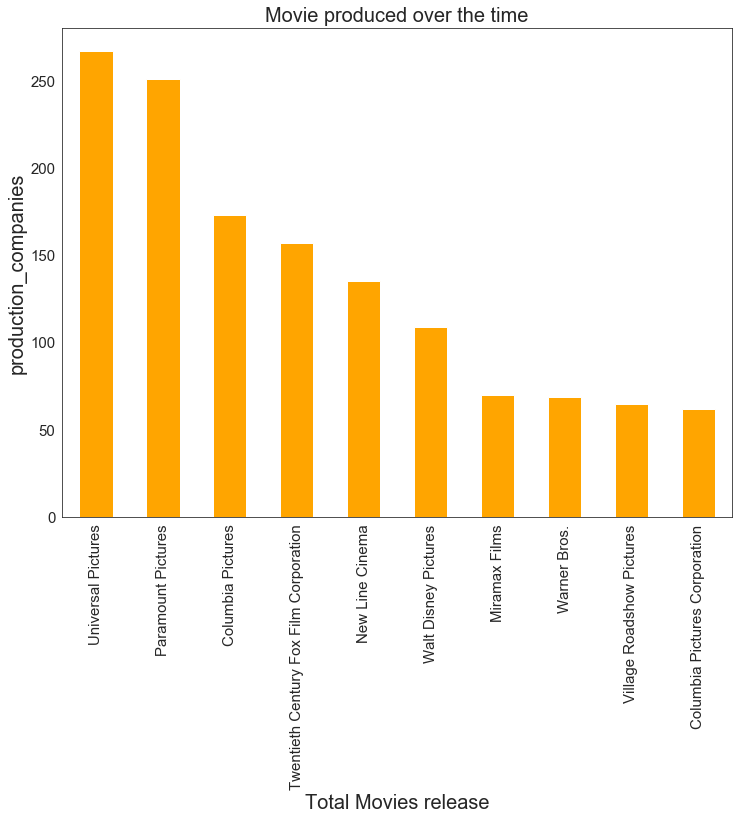

production_companies
Universal Pictures                        267
Paramount Pictures                        251
Columbia Pictures                         173
Twentieth Century Fox Film Corporation    157
New Line Cinema                           135
Walt Disney Pictures                      109
Miramax Films                              70
Warner Bros.                               69
Village Roadshow Pictures                  65
Columbia Pictures Corporation              62
Name: id, dtype: int64


In [71]:
pcmovies = df1.groupby('production_companies').count()['id'].copy()
pcmovies = pcmovies.sort_values(ascending = False).head(10)
sns.set_style("white")
pcmovies.plot(kind= 'bar',figsize = (12,9),fontsize=15,color = 'orange')
plt.xlabel('Total Movies release' , fontsize = 20)
plt.ylabel('production_companies' , fontsize = 20)
plt.title('Movie produced over the time',fontsize = 20)
plt.show()
print(pcmovies)

#df1['production_companies'].value_counts()

       genres                    production_companies  counts
0      Action                      Universal Pictures      65
1      Action                      Paramount Pictures      53
2      Action  Twentieth Century Fox Film Corporation      44
3      Action                       Columbia Pictures      39
4   Adventure                      Universal Pictures      28
5   Adventure                      Paramount Pictures      19
6   Adventure  Twentieth Century Fox Film Corporation      16
7   Adventure                       Columbia Pictures       7
8      Comedy                      Universal Pictures      57
9      Comedy                      Paramount Pictures      53
10     Comedy                       Columbia Pictures      38
11     Comedy  Twentieth Century Fox Film Corporation      37
12      Drama                      Paramount Pictures      46
13      Drama                      Universal Pictures      37
14      Drama                       Columbia Pictures      36
15      

ValueError: shape mismatch: objects cannot be broadcast to a single shape

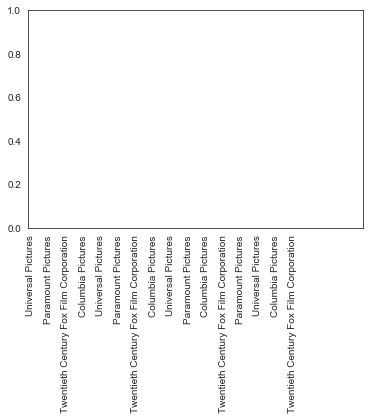

In [129]:
popular_genre = ['Drama','Action','Comedy', 'Adventure']
popular_pc = ['Universal Pictures','Paramount Pictures','Columbia Pictures','Twentieth Century Fox Film Corporation']
pcgenre = df1[df1['genres'].isin(popular_genre) & df1['production_companies'].isin(popular_pc)].groupby('genres')['production_companies'].value_counts().reset_index(name = 'counts').copy()
print(pcgenre)

x = np.arange(20)
ax1 = plt.subplot(1,1,1)
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective production companies names.
plt.xticks(x + w /2, pcgenre['production_companies'], rotation='vertical')
Action =ax1.bar(x, pcgenre[pcgenre['genres']=='Action']['counts'], width=w, color='b', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
#ax2 = ax1.twinx()
#Comedy =ax2.bar(x + w, pcgenre[[pcgenre['genres']=='Comedy']], width=w,color='g',align='center')
#Set the Y axis label as GDP.
#plt.ylabel('Comedy')
#To set the legend on the plot we have used plt.legend()
#plt.legend([Action, Comedy],['Action', 'Comedy'])
#To show the plot finally we have used plt.show().
plt.show()



             production_companies  release_year  counts
0               Bryna Productions          1960       1
1             Shamley Productions          1960       1
2         The Mirisch Corporation          1960       1
3                  United Artists          1960       1
4                  United Artists          1961       2
...                           ...           ...     ...
2012                Waverly Films          2015       1
2013               Wildgaze Films          2015       1
2014         Wildwood Enterprises          2015       1
2015  Wonderland Sound and Vision          2015       1
2016      Worldview Entertainment          2015       1

[2017 rows x 3 columns]


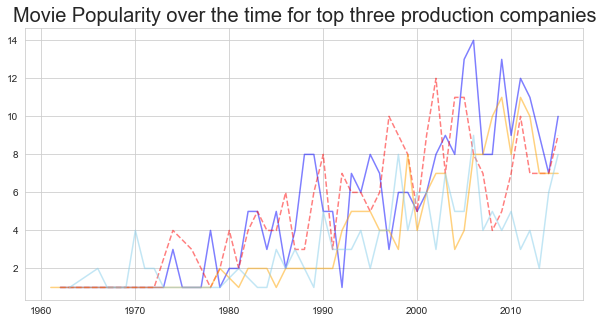

In [66]:
pc = df1.groupby('release_year')['production_companies'].value_counts().reset_index(name = 'counts').copy()
pc.set_index('production_companies',inplace =True)
#pc[pc["release_year"].between(2000,2015)].groupby(['release_year'])['counts'].idxmax()
#pc[pc["release_year"].between(2010,2015)]
pc = pc.reset_index()
print(pc)

sns.set_style("whitegrid")
fig,ax = plt.subplots(figsize=(10,5))
x = pc[pc['production_companies']=='Universal Pictures']['release_year']
y = pc[pc['production_companies']=='Universal Pictures']['counts']
x1 = pc[pc['production_companies']=='Paramount Pictures']['release_year']
y1 = pc[pc['production_companies']=='Paramount Pictures']['counts']
x2 = pc[pc['production_companies']=='Columbia Pictures']['release_year']
y2 = pc[pc['production_companies']=='Columbia Pictures']['counts']
x3 = pc[pc['production_companies']=='Twentieth Century Fox Film Corporation']['release_year']
y3 = pc[pc['production_companies']=='Twentieth Century Fox Film Corporation']['counts']

plt.title('Movie Popularity over the time for top three production companies',fontsize = 20)
plt.plot(x, y,'b',x1,y1,'r--',x2,y2,'orange',x3,y3,'skyblue', alpha=0.5,)





><div class="alert alert-success" role="alert"> 
><div class="alert alert-danger" role="alert">
    1. Universal has been always a leader in movies production (blue line)<br/>
    2. Paramount is a great competitior and holds second position after Universal <br/>
    3. Columbia and Twentieth Century Fox Film Corporation started catching up from 1990s
</div>    
</div>

<a id='wrangling'></a>
## Analyze word frequency for:
### keywords for most popular genres
### keywords for most popular production companies

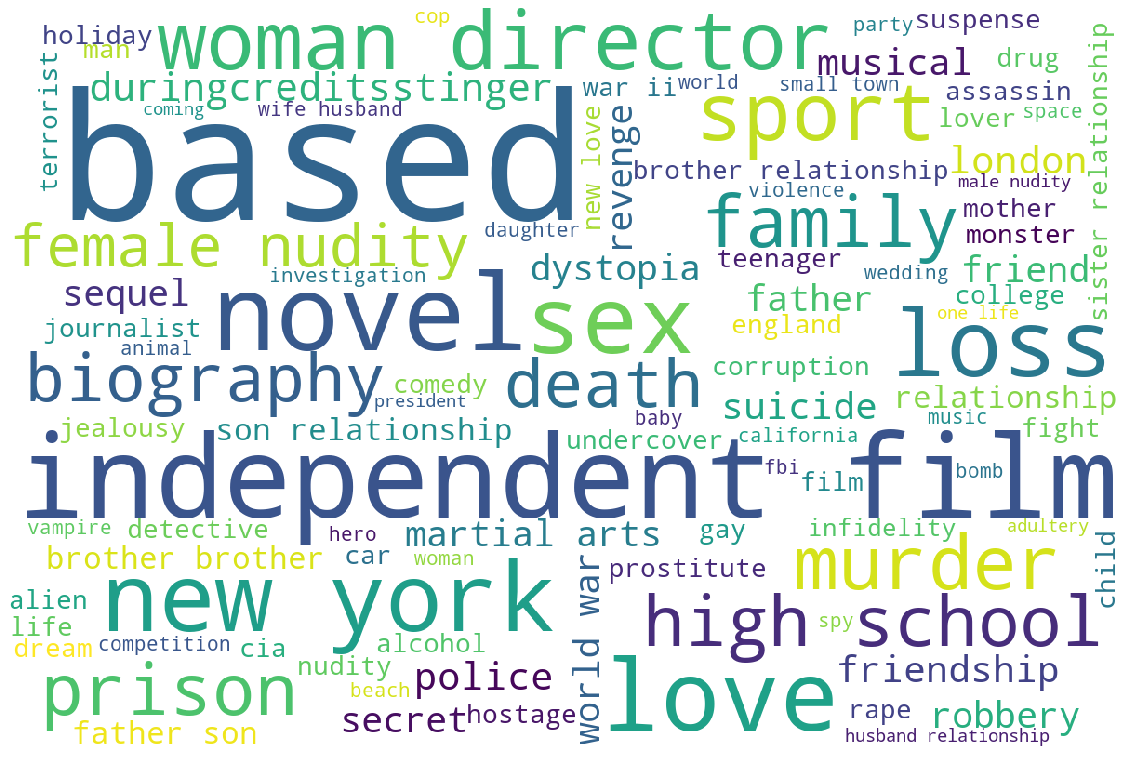

In [51]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

wordcount = WordCloud(width=1200, height=800,background_color="white", max_words=100,stopwords=STOPWORDS)
plt.figure( figsize=(20,20) );
popular_genre = ['Drama','Action','Comedy', 'Adventure']
imp_words = wordcount.generate(df2.loc[df2['genres'].isin(popular_genre), 'keywords'].str.cat(sep='|'));
plt.imshow(imp_words);
plt.axis("off");
#plt.imshow(wordcount);
plt.show();


<function matplotlib.pyplot.show(*args, **kw)>

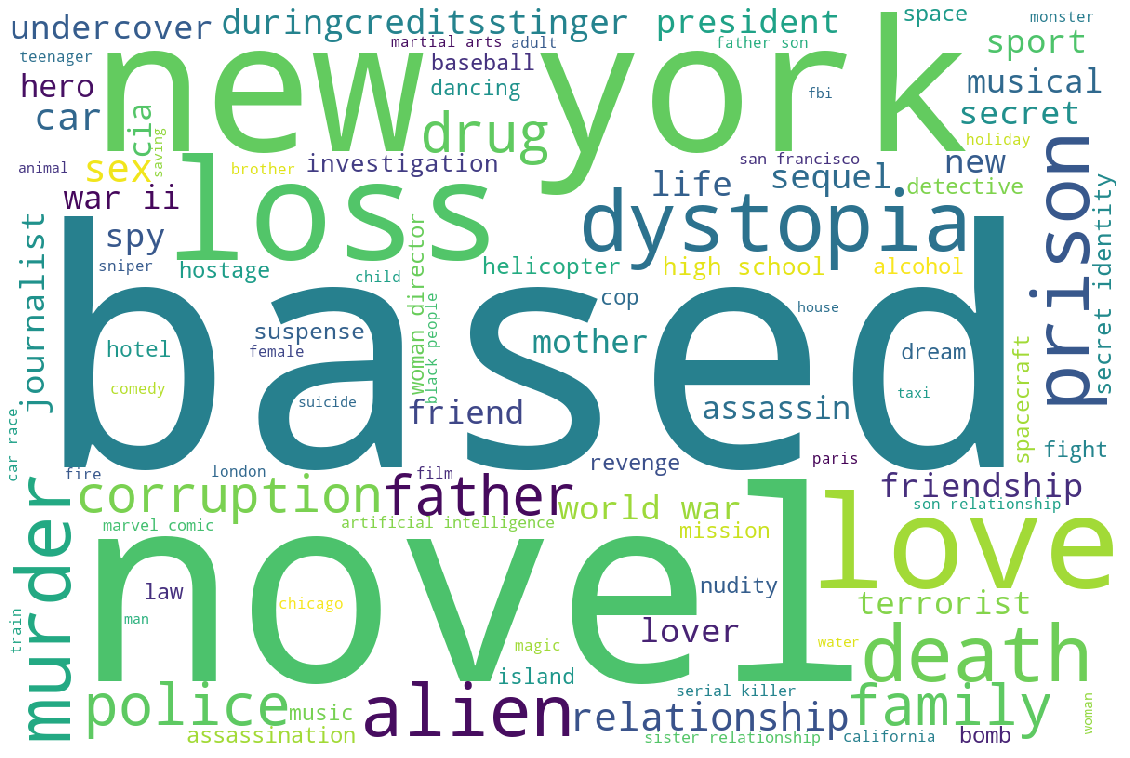

In [52]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

wordcount = WordCloud(width=1200, height=800,background_color="white", max_words=100,stopwords=STOPWORDS)
plt.figure( figsize=(20,20) );
popular_pc = ['Universal Pictures','Paramount Pictures','Columbia Pictures','Twentieth Century Fox Film Corporation']
imp_words = wordcount.generate(df1.loc[df2['production_companies'].isin(popular_pc), 'keywords'].str.cat(sep='\n'));
plt.imshow(imp_words);
plt.axis("off");
#plt.imshow(wordcount);
plt.show



<a id='conclusions'></a>
## Conclusions

> <div class="alert alert-success" role="alert"><br/>
    Based on the graphs created, below is the analysis: <br/>
    1. Top highlighted production houses are - 'Universal Pictures', 'Paramount Pictures' and 'Columbia Pictures'<br/>
    2. Below are the few things I would definitely incorporate to my movie subject:<br/>
        -  women director<br/>
        -  independent film<br/>
        -  novel based<br/>
        -  movie with locations like new York and London<br/>
        - loss od close ones in the movies
    
    
><div class="alert alert-danger" role="alert"> <br/>
    Final conclusion and recommendations:<br/>
    1. The maximum number of Drama and Comedy Genre movies are produced by the competitors and their budget is less than Action/Adventure and ranked after them for profit, hence I would like to create Drama (or Comedy) genre as my first movie.
    2. I will prefer Universal studios


    

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_TMDb_Dataset_Pankaj_Pant_08282020.ipynb'])

0